In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
angle1 = np.array([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115])
puissance1 = np.array([0.295,0.292,0.284,0.272,0.257,0.238,0.217,0.193,0.170,0.144,0.119,0.093,0.071,0.050,0.032,0.018,0.008,0.002,0.001,0.004,0.011,0.022,0.037,0.056])
# P1_0 = 0.434
P1_0 = puissance1[0]
T1 = puissance1/P1_0

angles2 = np.array([[0,0],[5,10],[10,20],[15,30],[20,40],[25,50],[30,60],[40,80],[50,100],[60,120],[65,130],[70,140],[75,150],[80,160],[85,170],[90,180],[95,190],[100,200],[105,210],[110,220],[115,230]])
puissance2 = np.array([0.191,0.187,0.177,0.163,0.145,0.125,0.103,0.062,0.037,0.011,0.006,0.003,0.0012,0.0007,0.0006,0.0006,0.0006,0.0008,0.0016,0.0037,0.0075])
# P2_0 = 0.442
P2_0 = puissance2[0]
x = [(angle[1]-angle[0]) for angle in angles2]
incertitude_y = [0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.00005,0.00005,0.00005,0.00005,0.00005,0.00005,0.00005]

T2 = puissance2/P2_0

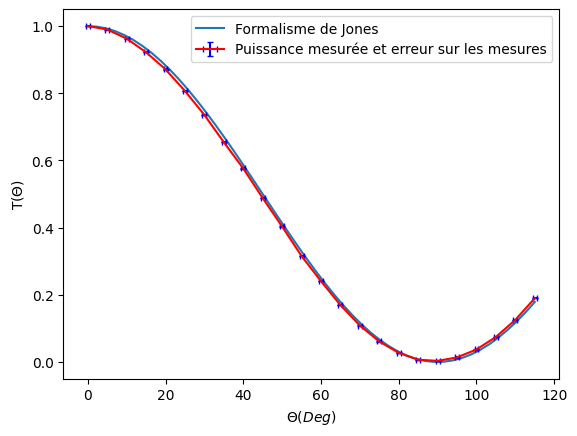

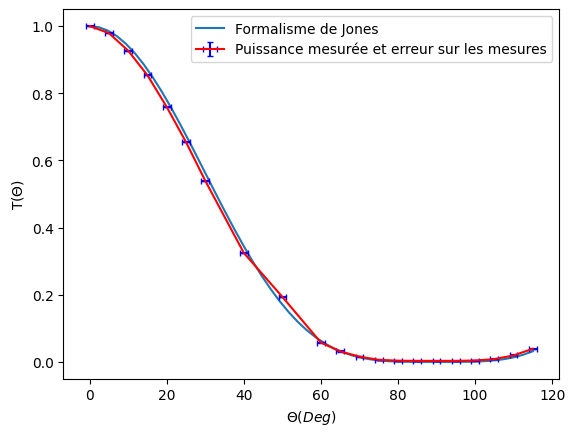

In [24]:
# Calcul de l'amplitude du vecteur de Jones pour 1 polariseur dépendant de theta


def jones1Pol(theta):

    M2 = np.array([[(np.cos(theta))**2,np.sin(theta)*np.cos(theta) ],[np.sin(theta)*np.cos(theta),(np.sin(theta))**2 ]])
    M3 = np.array([[(np.cos(2*theta))**2,np.sin(2*theta)*np.cos(2*theta) ],[np.sin(2*theta)*np.cos(2*theta),(np.sin(2*theta))**2 ]])
    J_ini = np.array([1, 0])

    M_tot = M2
    J_fin = M_tot.dot(J_ini)

    return np.linalg.norm(J_fin)**2

# Calcul de l'amplitude du vecteur de Jones pour 2 polariseur dépendant de theta
def jones2Pol(theta):

    M2 = np.array([[(np.cos(theta))**2,np.sin(theta)*np.cos(theta) ],[np.sin(theta)*np.cos(theta),(np.sin(theta))**2 ]])
    M3 = np.array([[(np.cos(2*theta))**2,np.sin(2*theta)*np.cos(2*theta) ],[np.sin(2*theta)*np.cos(2*theta),(np.sin(2*theta))**2 ]])
    J_ini = np.array([1, 0])

    M_tot = M3@M2
    J_fin = M_tot.dot(J_ini)

    return np.linalg.norm(J_fin)**2

# Définition des vecteur pour les graphs
epsilon = 0.05
thetaPoints = np.linspace(0, np.deg2rad(115), 50)
thetaPoints2 = np.linspace(0+epsilon, np.pi/2+epsilon, 50)
power1Coeff = []
power2Coeff = []
cos2 = (np.cos(thetaPoints2))**2
cos4 = (np.cos(thetaPoints2))**4


# Pas opti, mais ca marche
for theta in thetaPoints : 
    power1Coeff.append(jones1Pol(theta))
    power2Coeff.append(jones2Pol(theta))

thetaPoints = np.rad2deg(thetaPoints)
thetaPoints2 = np.rad2deg(thetaPoints2)

# Graphiques Jones (à modifier pour les cas classiques)
plt.figure()
plt.plot(thetaPoints, power1Coeff, label='Formalisme de Jones')
# plt.plot(thetaPoints2, cos2,'.',  label='Formalisme classique')
plt.errorbar(angle1, T1, xerr = 0.5, yerr=0.0005, ecolor='blue' , label='Puissance mesurée et erreur sur les mesures', color='red', markersize=5, capsize=2)
plt.xlabel(f'$\Theta (Deg)$')
plt.ylabel(f'T($\Theta$)')
plt.legend(prop={'size': 10})
plt.savefig('2pol_analysis.png')

plt.figure()
plt.plot(thetaPoints, power2Coeff, label='Formalisme de Jones')
# plt.plot(thetaPoints2, cos4,'.',  label='Formalisme classique')
plt.errorbar( x, T2, xerr = 1, yerr=incertitude_y, ecolor='blue' , label='Puissance mesurée et erreur sur les mesures', color='red', markersize=5, capsize=2)
plt.xlabel(f'$\Theta (Deg)$')
plt.ylabel(f'T($\Theta$)')
plt.legend(prop={'size': 10})
plt.savefig('3pol_analysis.png')
